In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/refs/heads/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
#checking the total rows and columns
df.shape

(32560, 15)

In [5]:
"The dataset contains 32560 rows and 15 columns."

'The dataset contains 32560 rows and 15 columns.'

In [6]:
#checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
#checking for duplicated value
df.duplicated().sum()

24

In [8]:
"In dataset No null values but 24 duplicate values are present. so we need to remove it."

'In dataset No null values but 24 duplicate values are present. so we need to remove it.'

In [9]:
#drop all duplicate values
df.drop_duplicates(keep=False, inplace=True)

In [10]:
#after dropping duplicates need to reset index 
df=df.reset_index(drop=True)

In [11]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [12]:
#again checking rows and column
df.shape

(32513, 15)

In [13]:
#again checking duplicated values
df.duplicated().sum()

0

In [14]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Age
36    898
31    888
34    886
33    875
23    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64


Workclass
 Private             22651
 Self-emp-not-inc     2539
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


Fnlwgt
164190    13
123011    13
203488    13
121124    12
148995    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21637, dtype: int64


Education
 HS-grad         10487
 Some-college     7273
 Bachelors        5350
 Masters          1721
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           644
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           331
 1st-4th           165
 Preschool       

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32513 entries, 0 to 32512
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32513 non-null  int64 
 1   Workclass       32513 non-null  object
 2   Fnlwgt          32513 non-null  int64 
 3   Education       32513 non-null  object
 4   Education_num   32513 non-null  int64 
 5   Marital_status  32513 non-null  object
 6   Occupation      32513 non-null  object
 7   Relationship    32513 non-null  object
 8   Race            32513 non-null  object
 9   Sex             32513 non-null  object
 10  Capital_gain    32513 non-null  int64 
 11  Capital_loss    32513 non-null  int64 
 12  Hours_per_week  32513 non-null  int64 
 13  Native_country  32513 non-null  object
 14  Income          32513 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
"In dataset two types of data are present int64 and object with memory usage."

'In dataset two types of data are present int64 and object with memory usage.'

In [20]:
#checking no of unique values in each col
df.nunique().to_frame("No of unique values")

,No of unique values
Age,73
Workclass,9
Fnlwgt,21637
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [21]:
"""In this dataset feature Education and Education_num have the same values like education_num column have the numeric 
representation of Education column eg. Bachelors-13 ,HS-grade-9 ,11th-7 therefore we can drop the Education column."""

'In this dataset feature Education and Education_num have the same values like education_num column have the numeric \nrepresentation of Education column eg. Bachelors-13 ,HS-grade-9 ,11th-7 therefore we can drop the Education column.'

In [22]:
df.drop('Education',axis=1,inplace=True)

In [23]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [24]:
#separating numerical and categorical columns

#checking for categorical column

cat=list(df.select_dtypes(include='object'))
print("Categorical columns: ",cat)
print("\n")

#checking for numerical columns
num=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num.append(i)
print("numerical columns: ",num)
print("\n")

Categorical columns:  ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


numerical columns:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']




In [25]:
#checking the list of counts of target
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [26]:
'there are 2 categories present in target yes and no'

'there are 2 categories present in target yes and no'

In [27]:
#checking the unique values of target col
df["Income"].value_counts()

Income
 <=50K    24676
 >50K      7837
Name: count, dtype: int64

In [28]:
#statistical summary of numerical col
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32513.000000,3.251300e+04,32513.000000,32513.000000,32513.000000,32513.000000
mean,38.589026,1.897870e+05,10.082613,1079.172946,87.432719,40.443207
std,13.635737,1.055611e+05,2.570883,7390.625579,403.243596,12.346348
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369850e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Income
 <=50K    24676
 >50K      7837
Name: count, dtype: int64


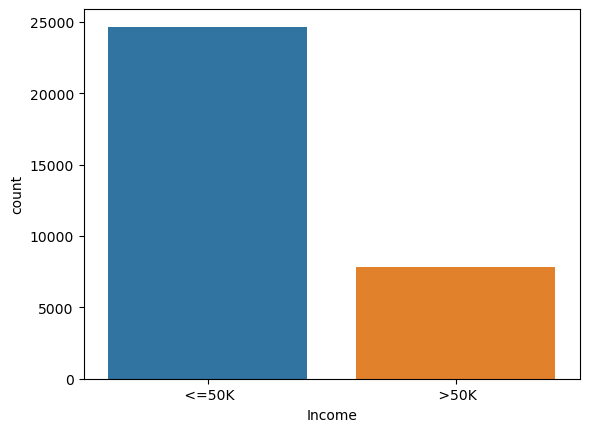

In [29]:
#DATA VISUALIZATION
#visualized the no of Income
ax=sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())

In [30]:
"'Here we can see the count of people makes income >50k is less than the income <=50k'"

"'Here we can see the count of people makes income >50k is less than the income <=50k'"

Education_num
9     10487
10     7273
13     5350
14     1721
11     1382
7      1175
12     1067
6       933
4       644
15      576
5       514
8       433
16      413
3       331
2       165
1        49
Name: count, dtype: int64


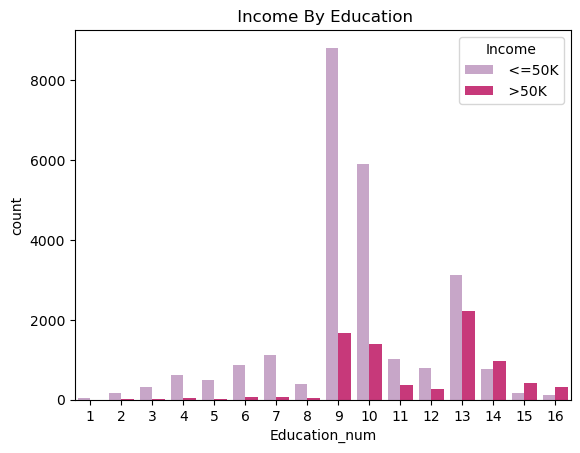

In [31]:
#visualizing the count of Income by Education 
print(df['Education_num'].value_counts())
ax=sns.countplot(x='Education_num',data=df,hue='Income',palette='PuRd')
plt.title(" Income By Education")
plt.show()

In [32]:
"""From above observations we can say the people who is the batchelors (education_num 13) they having income >50k and the more
HS-grade people having income <=50k"""

'From above observations we can say the people who is the batchelors (education_num 13) they having income >50k and the more\nHS-grade people having income <=50k'

Sex
 Male      21759
 Female    10754
Name: count, dtype: int64


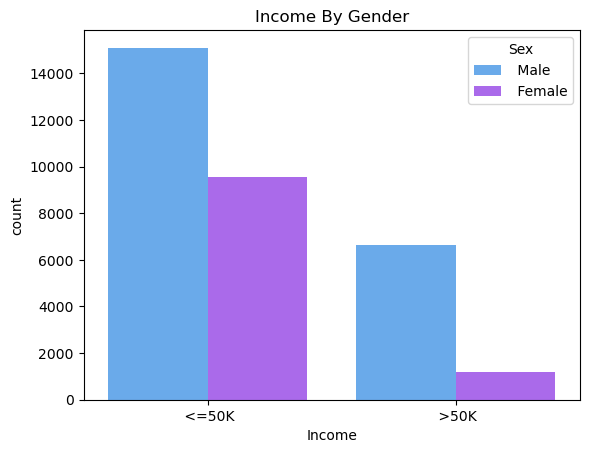

In [33]:
#visualizing the Income by Gender
print(df['Sex'].value_counts())
ax=sns.countplot(x='Income',data=df,hue='Sex',palette='cool')
plt.title("Income By Gender")
plt.show()

In [ ]:
"'The Male people having income >50k '"

Occupation
 Prof-specialty       4132
 Craft-repair         4089
 Exec-managerial      4064
 Adm-clerical         3765
 Sales                3650
 Other-service        3287
 Machine-op-inspct    1998
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1368
 Farming-fishing       990
 Tech-support          926
 Protective-serv       649
 Priv-house-serv       146
 Armed-Forces            9
Name: count, dtype: int64


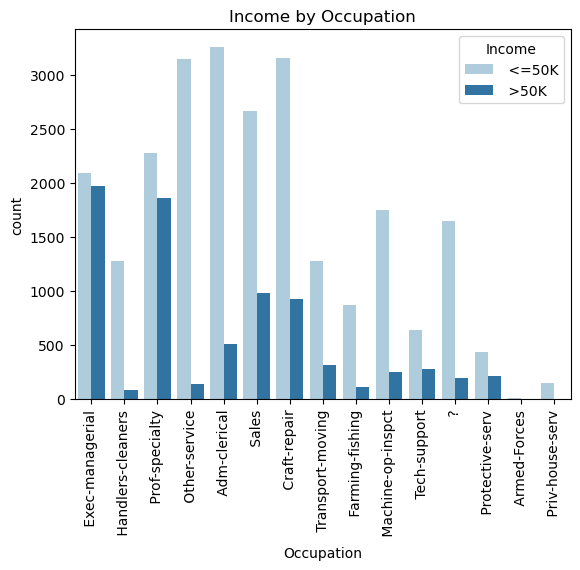

In [34]:
#visualizing the count of Income by Occupation
print(df['Occupation'].value_counts())
ax=sns.countplot(x='Occupation',data=df,hue='Income',palette='Paired')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Income by Occupation")
plt.show()

In [35]:
"""Here we can see the people whoes occupation is Exec-manegerial and prof-specialty have the income >50k. """

'Here we can see the people whoes occupation is Exec-manegerial and prof-specialty have the income >50k. '

Marital_status
 Married-civ-spouse       14964
 Never-married            10651
 Divorced                  4439
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64


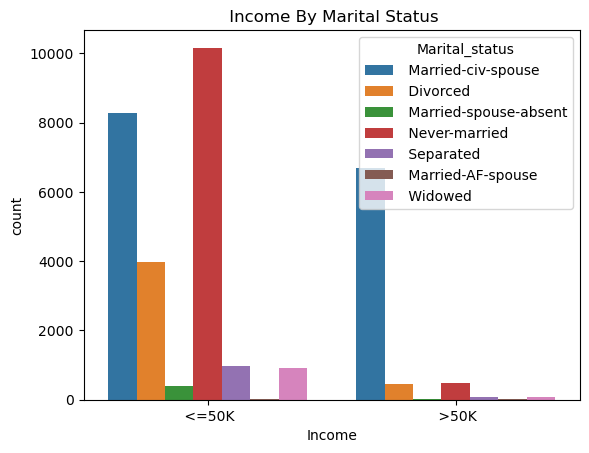

In [36]:
#visualizing the count of Income by Marital Status
print(df['Marital_status'].value_counts())
ax=sns.countplot(x='Income',data=df,hue='Marital_status',palette='tab10')
plt.title(" Income By Marital Status")
plt.show()

In [37]:
"Here we can see the people who is married-civ-spouse having more income >50k."

'Here we can see the people who is married-civ-spouse having more income >50k.'

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16')])

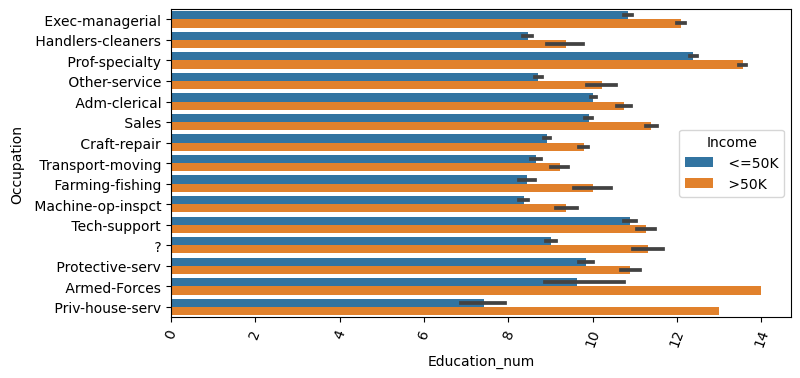

In [38]:
#Checking the income by Occupation and Education
plt.figure(figsize=(8,4))
ax=sns.barplot(x='Education_num',y='Occupation',data=df,hue='Income')
plt.xticks(rotation=70)

In [39]:
"""Here we can see the income of Exec-managerial,prof-speciality,Armed forces,priv-house-serv is >50k"""

'Here we can see the income of Exec-managerial,prof-speciality,Armed forces,priv-house-serv is >50k'

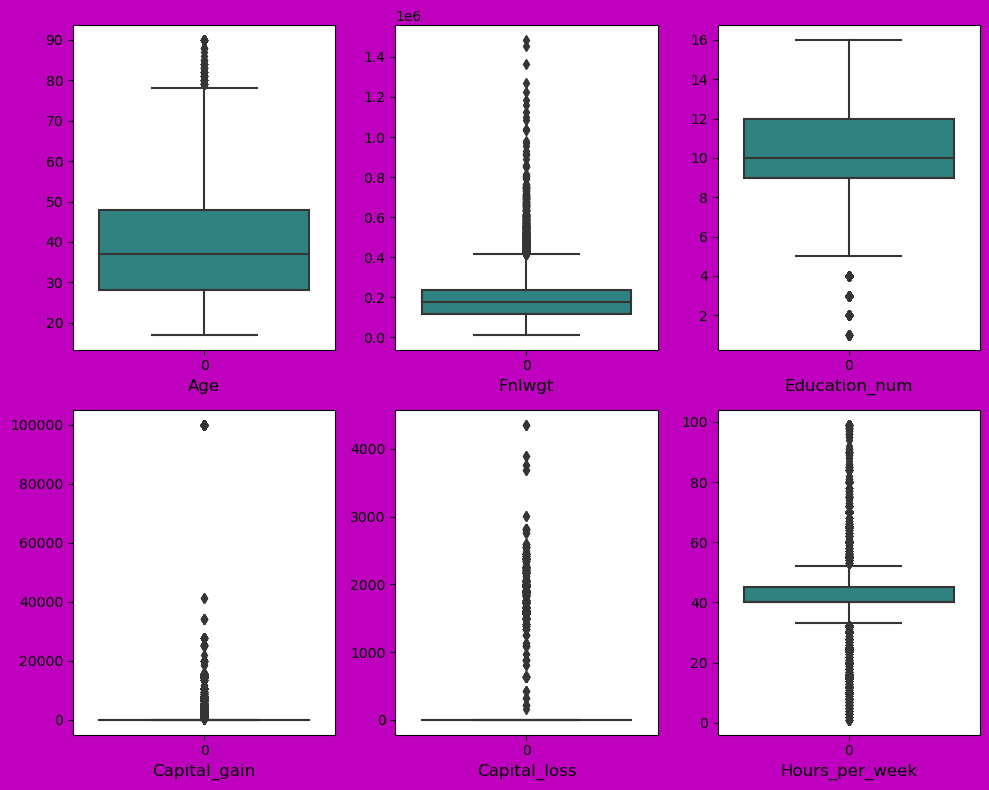

In [40]:
#checking the outliers using boxplot
plt.figure(figsize=(10,8),facecolor="m")
plotnumber=1
for col in num:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col],palette="viridis_r")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [41]:
"""Here we can see the outliers present in all columns.using Zscore and IQR technique we can remove outliers."""

'Here we can see the outliers present in all columns.using Zscore and IQR technique we can remove outliers.'

In [42]:
from scipy.stats import zscore
z_score=zscore(df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [43]:
#after removing outliers
df.shape

(29788, 14)

In [44]:
"""After removing the outliers dataset contains 29788 rows and 14 columns """

'After removing the outliers dataset contains 29788 rows and 14 columns '

In [45]:
#encoding categorical cols using LabelEncoder

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=lab_enc.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,38,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,38,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,38,0
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32508,27,4,257302,12,2,13,5,4,0,0,0,38,38,0
32509,40,4,154374,9,2,7,0,4,1,0,0,40,38,1
32510,58,4,151910,9,6,1,4,4,0,0,0,40,38,0
32511,22,4,201490,9,4,1,3,4,1,0,0,20,38,0


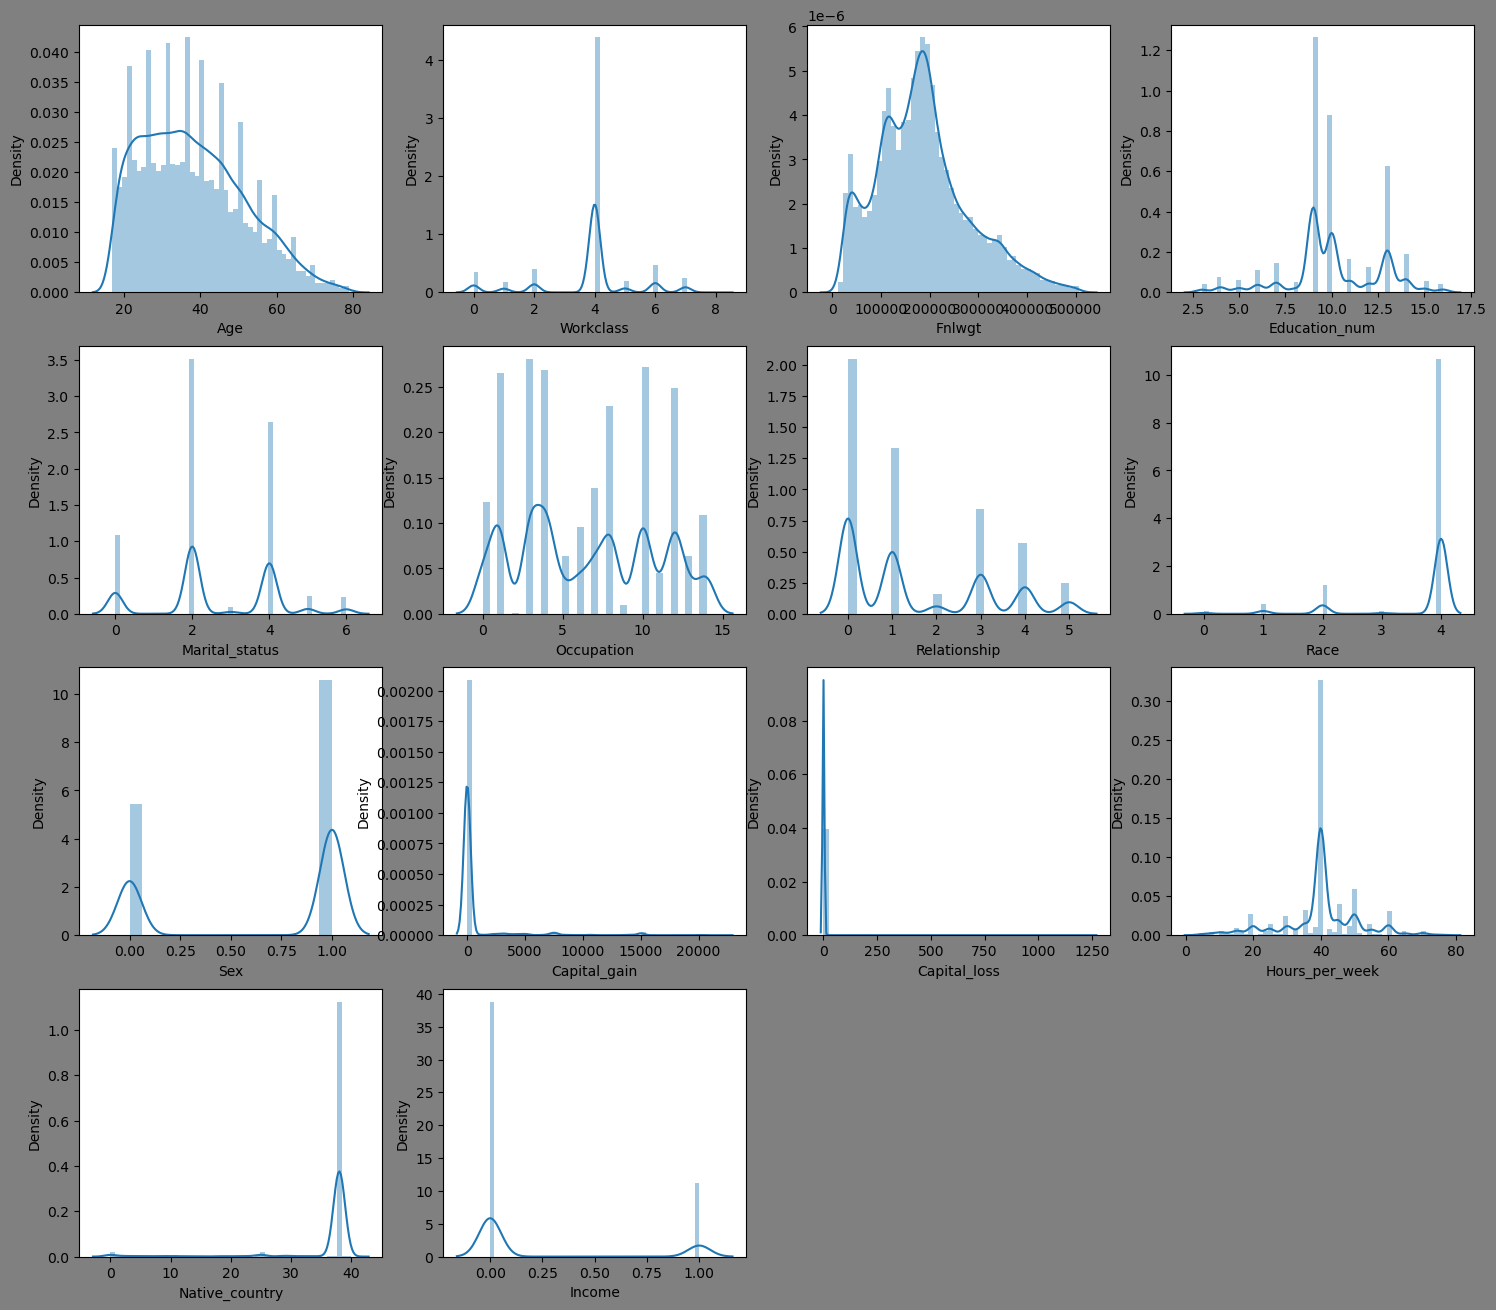

In [46]:
#Cheking For Skewness
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor='grey')
p=1
for col in df:
    if p<=14:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

In [47]:
df.skew()

Age                0.491083
Workclass         -0.742328
Fnlwgt             0.635538
Education_num     -0.169323
Marital_status    -0.047892
Occupation         0.120074
Relationship       0.743378
Race              -2.435484
Sex               -0.679968
Capital_gain       4.940049
Capital_loss      29.641780
Hours_per_week    -0.352067
Native_country    -3.717900
Income             1.329279
dtype: float64

In [48]:
"""the col Workclass,Relationship,Race,capital gain,capital loss,Native country, have skewness in the data.since, 
Native country,Workclass,Relationship,Race is categorical no need to remove skewness.since remaning all is contineous in 
natures, using cube root method we can remove skewness"""

'the col Workclass,Relationship,Race,capital gain,capital loss,Native country, have skewness in the data.since, \nNative country,Workclass,Relationship,Race is categorical no need to remove skewness.since remaning all is contineous in \nnatures, using cube root method we can remove skewness'

In [49]:
#Using cube root method we can remove skewness
df['Capital_gain']=np.cbrt(df['Capital_gain'])
df['Capital_loss']=np.cbrt(df['Capital_loss'])

In [50]:
#again checking skewness
df.skew()

Age                0.491083
Workclass         -0.742328
Fnlwgt             0.635538
Education_num     -0.169323
Marital_status    -0.047892
Occupation         0.120074
Relationship       0.743378
Race              -2.435484
Sex               -0.679968
Capital_gain       3.372358
Capital_loss      25.748867
Hours_per_week    -0.352067
Native_country    -3.717900
Income             1.329279
dtype: float64

In [51]:
#checking the correlation between features and target
cor=df.corr()
cor

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.008492,-0.074354,0.041437,-0.285072,-0.015857,-0.266780,0.027913,0.086577,0.130403,0.020488,0.091439,-0.000100,0.239244
Workclass,0.008492,1.000000,-0.015832,0.048883,-0.059413,0.251436,-0.089703,0.045821,0.092866,0.018678,-0.006343,0.127045,-0.006104,0.042232
Fnlwgt,-0.074354,-0.015832,1.000000,-0.038015,0.028930,-0.001160,0.008283,-0.010597,0.028772,-0.004525,0.001435,-0.015608,-0.050881,-0.009184
Education_num,0.041437,0.048883,-0.038015,1.000000,-0.059199,0.108262,-0.096869,0.028627,0.009409,0.131692,0.009047,0.150910,0.026156,0.318862
Marital_status,-0.285072,-0.059413,0.028930,-0.059199,1.000000,-0.007328,0.184758,-0.066122,-0.123470,-0.070790,-0.015993,-0.195048,-0.020973,-0.194294
Occupation,-0.015857,0.251436,-0.001160,0.108262,-0.007328,1.000000,-0.074062,0.006644,0.081596,0.019199,0.000318,0.070007,-0.012166,0.069690
Relationship,-0.266780,-0.089703,0.008283,-0.096869,0.184758,-0.074062,1.000000,-0.116181,-0.577280,-0.091542,0.034254,-0.257688,-0.004981,-0.245916
Race,0.027913,0.045821,-0.010597,0.028627,-0.066122,0.006644,-0.116181,1.000000,0.090079,0.025657,0.000130,0.045465,0.135939,0.071776
Sex,0.086577,0.092866,0.028772,0.009409,-0.123470,0.081596,-0.577280,0.090079,1.000000,0.071903,-0.031013,0.233606,-0.008255,0.209936
Capital_gain,0.130403,0.018678,-0.004525,0.131692,-0.070790,0.019199,-0.091542,0.025657,0.071903,1.000000,-0.011430,0.089143,0.007312,0.312022


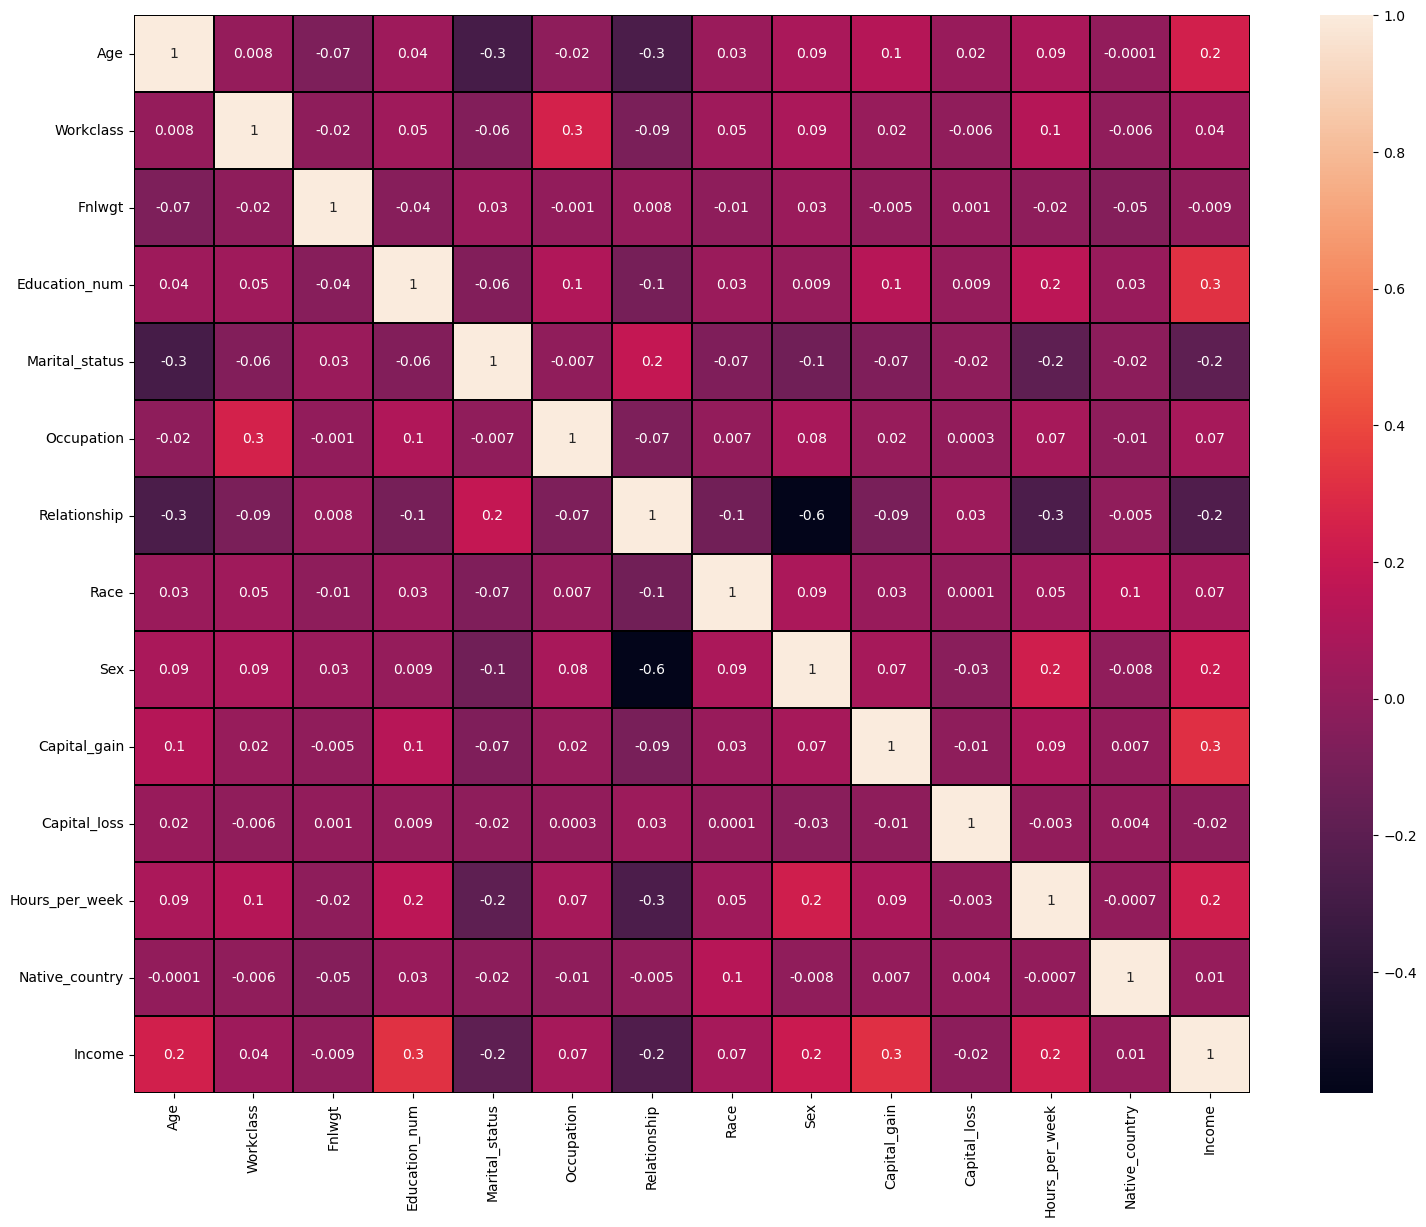

In [52]:
#visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(),linewidths=0.2,fmt=".1g",linecolor="black",annot=True)
plt.yticks(rotation=0);
plt.show()

In [53]:
"""Here we can see workclass,occupation,race,capital gain,hours per week are positively related to income and fnlwgt,
marital status,relationship,capital loss are negatively related."""

'Here we can see workclass,occupation,race,capital gain,hours per week are positively related to income and fnlwgt,\nmarital status,relationship,capital loss are negatively related.'

In [54]:
#We can observe the positive and negative correlated features with the target
cor['Income'].sort_values(ascending = False)

Income            1.000000
Education_num     0.318862
Capital_gain      0.312022
Age               0.239244
Hours_per_week    0.230558
Sex               0.209936
Race              0.071776
Occupation        0.069690
Workclass         0.042232
Native_country    0.012776
Fnlwgt           -0.009184
Capital_loss     -0.017369
Marital_status   -0.194294
Relationship     -0.245916
Name: Income, dtype: float64

In [55]:
#separating features and label
x=df.drop("Income",axis=1)
y=df["Income"]

In [56]:
#Feature Scaling using Standard Scalarization
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.886959,1.474495,-1.077594,1.191093,-0.410071,-0.603101,-0.919003,0.394042,0.716242,-0.288364,-0.039637,-2.415949,0.286554
1,-0.011359,0.093726,0.321983,-0.439790,-1.730420,-0.130961,-0.297995,0.394042,0.716242,-0.288364,-0.039637,0.008812,0.286554
2,1.111539,0.093726,0.523720,-1.255232,-0.410071,-0.130961,-0.919003,-1.956561,0.716242,-0.288364,-0.039637,0.008812,0.286554
3,-0.759958,0.093726,1.620326,1.191093,-0.410071,0.813320,2.186035,-1.956561,-1.396176,-0.288364,-0.039637,0.008812,-4.109532
4,-0.086219,0.093726,1.051051,1.598814,-0.410071,-0.603101,2.186035,0.394042,-1.396176,-0.288364,-0.039637,0.008812,0.286554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29783,-0.834818,0.093726,0.762537,0.783372,-0.410071,1.521531,2.186035,0.394042,-1.396176,-0.288364,-0.039637,-0.170800,0.286554
29784,0.138361,0.093726,-0.326031,-0.439790,-0.410071,0.105109,-0.919003,0.394042,0.716242,-0.288364,-0.039637,0.008812,0.286554
29785,1.485838,0.093726,-0.352090,-0.439790,2.230626,-1.311312,1.565028,0.394042,-1.396176,-0.288364,-0.039637,0.008812,0.286554
29786,-1.209117,0.093726,0.172269,-0.439790,0.910277,-1.311312,0.944020,0.394042,0.716242,-0.288364,-0.039637,-1.787307,0.286554


In [57]:
#Checking Variance Inflation Factor(VIF)
#finding variance inflation factor in each scaled col 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.178594,Age
1,1.087728,Workclass
2,1.011183,Fnlwgt
3,1.059898,Education_num
4,1.136460,Marital_status
5,1.084163,Occupation
6,1.674518,Relationship
7,1.037482,Race
8,1.548326,Sex
9,1.041140,Capital_gain


In [58]:
"""By checking VIF values we can see there is no multicollinarity problem. """

'By checking VIF values we can see there is no multicollinarity problem. '

In [59]:
y.value_counts()

Income
0    23138
1     6650
Name: count, dtype: int64

In [60]:
"'Here we can see that the data is not balanced,SO we will balance the data using oversampling method'"

"'Here we can see that the data is not balanced,SO we will balance the data using oversampling method'"

In [61]:
#OVERSAMPLING
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [62]:
#checking value count of target col
y.value_counts()

Income
0    23138
1     6650
Name: count, dtype: int64

In [63]:
y1.value_counts()

Income
0    23138
1    23138
Name: count, dtype: int64

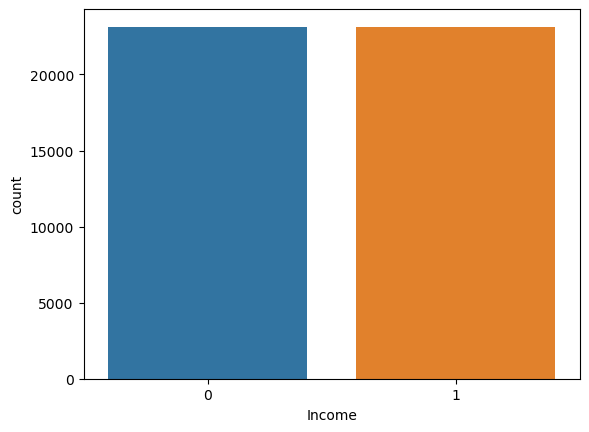

In [64]:
"""Now,we can see the data is balanced"""
#checking the count of Attrition
sns.countplot(data=df,x=y1)
plt.show()

In [65]:
#split into train test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=110)

In [66]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n----------------Train Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n----------------Test Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\n The Classification Report\n', classification_report(y_test,pred,digits=2))

In [67]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 90.41%


 The Classification Report
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      6887
           1       0.90      0.91      0.91      6996

    accuracy                           0.90     13883
   macro avg       0.90      0.90      0.90     13883
weighted avg       0.90      0.90      0.90     13883



In [69]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [70]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 76.14%

----------------Test Result------------------

Accuracy Score: 75.98%


 The Classification Report
               precision    recall  f1-score   support

           0       0.76      0.75      0.76      6887
           1       0.76      0.77      0.76      6996

    accuracy                           0.76     13883
   macro avg       0.76      0.76      0.76     13883
weighted avg       0.76      0.76      0.76     13883



In [71]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)

ExtraTreesClassifier()

In [72]:
metric_score(ETC,x_train,x_test,y_train,y_test,train=True)
metric_score(ETC,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 90.72%


 The Classification Report
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      6887
           1       0.89      0.92      0.91      6996

    accuracy                           0.91     13883
   macro avg       0.91      0.91      0.91     13883
weighted avg       0.91      0.91      0.91     13883



In [77]:
#..........CROSS VALIDATION SCORE........
from sklearn.model_selection import cross_val_score

In [78]:
#checking cv score for Random Forest Classifier
score=cross_val_score(random_clf,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=random_clf.predict(x_test)
acc_score1=accuracy_score(y_test,pred)
acc_score1

print("Difference between Accuracy Score and Cross Validation Score:",acc_score1-score.mean())

[0.84877476 0.85162806 0.85146022 0.86050025 0.85697499]
0.8538676561006785
Difference between Accuracy Score and Cross Validation Score: 0.05018766335477065


In [79]:
#checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=LR.predict(x_test)
acc_score2=accuracy_score(y_test,pred)
acc_score2

print("Difference between Accuracy Score and Cross Validation Score:",acc_score2-score.mean())

[0.82225579 0.82611615 0.8271232  0.82491187 0.82440826]
0.8249630520351655
Difference between Accuracy Score and Cross Validation Score: -0.06518490610128957


In [80]:
#checking cv score for Extra Trees Classifier
score=cross_val_score(ETC,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=ETC.predict(x_test)
acc_score3=accuracy_score(y_test,pred)
acc_score3

print("Difference between Accuracy Score and Cross Validation Score:",acc_score3-score.mean())

[0.84525008 0.84390735 0.85162806 0.85512842 0.84723854]
0.848630492345191
Difference between Accuracy Score and Cross Validation Score: 0.05859417091203012


In [83]:
"""Random Forest Classifier is our best model as the difference between accuracy score and cross 
validation score is least

...............Random Forest Classifier  IS OUR BEST MODEL......"""

'Random Forest Classifier is our best model as the difference between accuracy score and cross \nvalidation score is least\n\n...............Random Forest Classifier  IS OUR BEST MODEL......'

In [85]:
#Hyper parameter tunning
from sklearn.model_selection import GridSearchCV
param={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[50,80,150],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

gscv=GridSearchCV(random_clf,param_grid=param,n_jobs=-1, cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 80, 150], 'random_state': [10]})

In [86]:
gscv.best_params_

{'criterion': 'entropy',
 'min_samples_split': 2,
 'n_estimators': 150,
 'random_state': 10}

In [87]:
model=RandomForestClassifier(criterion='entropy',random_state=10,n_estimators=150,min_samples_split=2)

In [88]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.29748613412086


In [89]:
#saving model
import joblib
joblib.dump(model,"income.pkl")

['income.pkl']

In [90]:
model=joblib.load("income.pkl")
prediction=model.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 1, 0])

In [91]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
13878,1,0
13879,0,0
13880,1,1
13881,1,1


In [ ]:
>>Random Forest Classifier is our best model as the difference between accuracy score and cross 
  validation score is least.
>>The best accuracy score is 90.29% person makes Census Income over $50K a year.